#### Importing main libraries

In [10]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import copy

#### Path directory 

In [2]:
input_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/input_files/'
output_data_path='/Users/leilasapple/Documents/Springboard/recruit-restaurant-visitor-forecasting/output_files/'

Data file which is generated by other part of project

In [ ]:
data.to_csv(os.path.join(output_data_path,'data1.csv'), encoding='utf-8',index=False)

In [3]:
data=pd.read_csv(os.path.join(output_data_path,'data1.csv'))

### Building the model

To check the relevance of the features to the number of visitors: ckeck the regression coefficent 
5 first features are categorical. Therefore we ignore them. 

In [4]:
coff=[0.,0.,0.,0.]
for i ,item in enumerate(data.keys()):
    if i>4:
        if np.corrcoef(data.iloc[:,i], data['visitor'])[0, 1]>0.2:
            print(i,item,'\t',np.corrcoef(data.iloc[:,i], data['visitor'])[0, 1])
#        coff=np.concatenate(coff,np.corrcoef(data.iloc[:,i], data['visitor'])[0, 1])
        
#6 dt     0.265833704757
#11 genre_area_index      0.247850154589
#13 store_holiday_index   0.354912255956
#15 store_month_index     0.477839293588
#17 day_month_index       0.21999743032
#18 holiday_day_month_index       0.230262207287
#20 store_index   0.344677327477
#21 store_day_index       0.44310819328
    

6 dt 	 0.2658337047572721
11 genre_area_index 	 0.24785015458927526
13 store_holiday_index 	 0.3549122559563655
15 store_month_index 	 0.47783929358821536
17 day_month_index 	 0.21999743031956168
18 holiday_day_month_index 	 0.23026220728665345
20 store_index 	 0.34467732747713836
21 store_day_index 	 0.4431081932798821


##### Extracting X and Y variable from data

In [5]:
modelinput=data.loc[:,[ 'genre', 'area', 'holiday', 'day','month','dt','store_index',
                       'store_holiday_index','store_month_index',
                       'store_day_index']]

In [6]:
X=modelinput.values.copy()
y=data.loc[:,'visitor'].values.copy()

##### Encoding categorical variables

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:, 0])
X[:,1] = labelencoder_X.fit_transform(X[:, 1])
X[:,2] = labelencoder_X.fit_transform(X[:, 2])
X[:,3] = labelencoder_X.fit_transform(X[:, 3])
X[:,4] = labelencoder_X.fit_transform(X[:, 4])
#X[:,5] = labelencoder_X.fit_transform(X[:, 5])
#X[:,6] = labelencoder_X.fit_transform(X[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4])
X = onehotencoder.fit_transform(X).toarray().astype(float)

In [8]:
len(X[0,:])

256

##### Categorizing independent variables

In [11]:
y_org=copy.deepcopy(y)

for i ,item in enumerate(y):
    if item <10: y[i]=1
#    if item >=5 and item <10 :y[i]=2
#    if item >=10 and item <15 :y[i]=3
#    if item >=15 and item <20 :y[i]=4
#    if item >=20 and item <30 :y[i]=5
#    if item >=30 and item <40 :y[i]=6
#    if item >=40 and item <50:y[i]=7
#    if item >=50 and item <60 :y[i]=8
#    if item >=60 and item <70 :y[i]=9
    if item >=10: y[i]=2

##### Checking for imbalanced data

In [12]:

balanced_ratio1=len(y[y==1])*100/len(y)
balanced_ratio2=len(y[y==2])*100/len(y)

print('Balanced ratios',balanced_ratio1,balanced_ratio2)

Balanced ratios 72.25562413577863 27.744375864221364


##### Spliting the data to test and training data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

##### The model

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50, random_state = 0,bootstrap=True,n_jobs=-1)
#,min_samples_leaf=5,min_samples_split=5,max_depth=None)

model.fit(x_train, y_train)

print(model.get_params().keys())
print(model.get_params())
print('SCORE: ',model.score(x_train,y_train))

'''print('feature:')
for i in range(len(model.feature_importances_)):
    if model.feature_importances_[i]*1000>10 :
        print(i,model.feature_importances_[i]*1000)'''

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
SCORE:  0.9988071669762136


"print('feature:')\nfor i in range(len(model.feature_importances_)):\n    if model.feature_importances_[i]*1000>10 :\n        print(i,model.feature_importances_[i]*1000)"

##### Applying the model over test dataset

In [28]:
y_pred = model.predict(x_test)
y_pred=np.around(y_pred).astype(int)

##### Evaluation the model

In [16]:
from sklearn import metrics

print("Precision: ",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall: ",metrics.recall_score(y_test, y_pred,average='micro'))
print('accuracy: ',metrics.accuracy_score(y_test, y_pred))
f= open(os.path.join(output_data_path,'output_RFC.txt'),"a")
f.write(str(datetime.now())+ '\n')
f.write(str(modelinput.keys())+ '\n')
f.write("Model : "+str(model)+ '\n')
f.write("SCORE : "+str(model.score(x_train,y_train)) + '\n')
f.write("Accuracy : "+str(metrics.accuracy_score(y_test, y_pred)) + '\n')
f.write('Precision: '+str(metrics.precision_score(y_test, y_pred,average='micro'))+ '\n')
f.write('Recall: '+str(metrics.recall_score(y_test,y_pred,average='micro'))+ '\n')

f.close()

Precision:  0.7518130485067012
Recall:  0.7518130485067012
accuracy:  0.7518130485067012


##### Confusion matrix evaluation

In [17]:
from sklearn.metrics import confusion_matrix

CONFM = confusion_matrix(y_test, y_pred)
tn = CONFM[0,0]; fp = CONFM[0,1]; fn = CONFM[1,0]; tp = CONFM[1,1];

NP = fn+tp # Num positive examples
NN = tn+fp # Num negative examples
N  = NP+NN
CONFM_accuracy=(tp+tn)/N
print('accuracy from confusion matrix',CONFM_accuracy)


accuracy from confusion matrix 0.7518130485067012


##### Choosing hyperparameters

In [ ]:
from sklearn.grid_search import GridSearchCV
datetime.now().time()
param_grid = {#"n_estimators": [10,50,100],
    "max_depth": [None,2,4,6],
#    "criterion" : ["gini", "entropy"],
#    "max_features": np.arange(5,55,250),
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1,2,4,6],
    "max_leaf_nodes"=[None,2,3,4,5],
    "n_jobs"=[-1,1]}
gridsearch=GridSearchCV(model, param_grid, scoring='accuracy',cv=10)
gridsearch=gridsearch.fit(x_train,y_train)

datetime.now().time()
print(gridsearch.best_params_)
print(gridsearch.best_score_)

f= open(os.path.join(output_data_path,'output_RFC.txt'),"a")
f.write(str(datetime.now().time())+ '\n')
f.write("GridSearch : "+str(gridsearch)+ '\n')
f.write("SCORE : "+str(gridsearch.best_score_) + '\n')

f.close()



In [37]:
y_pred[y_pred==1].sum()


117535

#### Visulazation the results

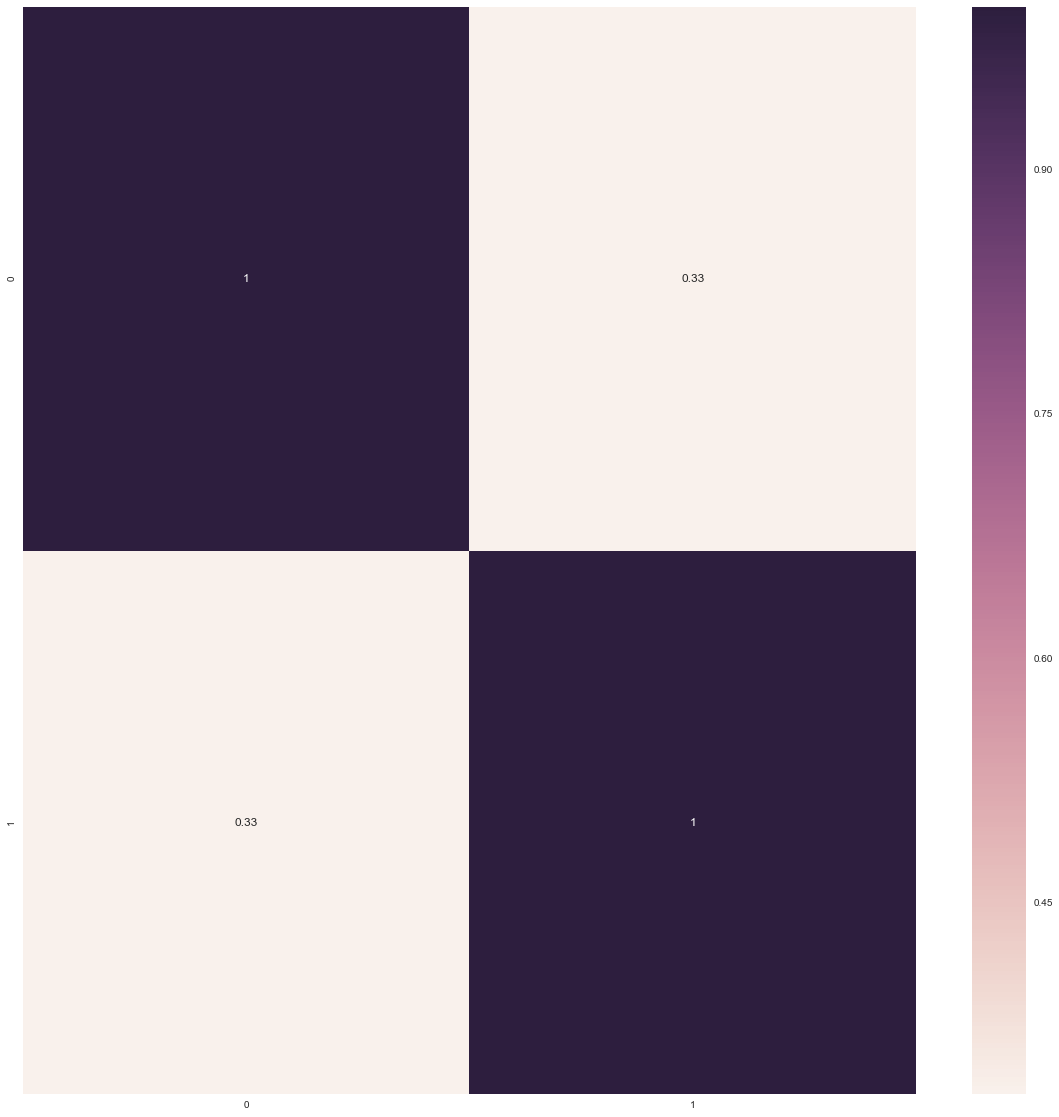

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
fig=plt.figure(figsize=(20, 20))
sn.heatmap(np.corrcoef(y_test, y_pred), annot=True)

plt.show()
fig.savefig(os.path.join(output_data_path,'Forcast.png'))   # save the figure to file\n",
plt.close(fig) 

In [38]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.33184501],
       [0.33184501, 1.        ]])